In [1]:
import os

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rasterio
import rioxarray as rxr
import xarray as xr

from exactextract import exact_extract
from rasterio.crs import CRS
from rasterio.mask import mask
from shapely.geometry import box

### To save one NHD file with correct CRS

In [ ]:
# nhd_path = '/nas/cee-water/cjgleason/fiona/narrow_rivers_PIXC_data/NHD_prepped_buffered_json/HUC2_01/NHDPLUS_H_0101_HU4_GDB_prepped_buffered_max.json'
nhd_path = '/nas/cee-water/cjgleason/fiona/narrow_rivers_PIXC_data/NHD_prepped_buffered/HUC2_01/NHDPLUS_H_0101_HU4_GDB_prepped_buffered_max.parquet'

In [ ]:
nhd = gpd.read_parquet(nhd_path)

In [ ]:
# nhd = nhd.to_crs('4236')
nhd.to_crs(nlcd_crs)

In [ ]:
nhd = nhd[['NHDPlusID', 'geometry']]

In [ ]:
save_path = '/nas/cee-water/cjgleason/fiona/narrow_rivers_PIXC_data/'
save_file = 'NHDPLUS_H_0101_HU4_GDB_prepped_buffered_max_TEST.json'

nhd.to_file(filename=os.path.join(save_path, save_file), driver='GeoJSON')

### To save one NLCD file with correct CRS

In [26]:
# del nlcd

In [68]:
nlcd_path = '/nas/cee-water/cjgleason/data/NLCD/Annual_NLCD_LndCov_2023_CU_C1V0.tif'
nlcd = rxr.open_rasterio(nlcd_path, masked=True)

In [61]:
with rasterio.open(nlcd_path) as src:
    nlcd_crs = src.crs

In [62]:
nlcd_crs

CRS.from_wkt('PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [37]:
test = nlcd.sel(x=slice(-2016000, -2015500), y=slice(3015000, 3014500))

In [38]:
test.to_numpy()

array([[[42., 42., 42., 42., 42., 42., 42., 90., 42., 42., 42., 42.,
         42., 42., 42., 42., 42.],
        [42., 42., 42., 42., 42., 42., 90., 90., 42., 42., 42., 42.,
         42., 42., 42., 42., 42.],
        [42., 42., 42., 42., 42., 42., 90., 90., 42., 42., 42., 42.,
         42., 42., 42., 42., 42.],
        [42., 42., 42., 42., 42., 42., 90., 90., 42., 42., 42., 42.,
         42., 42., 42., 42., 42.],
        [42., 42., 42., 42., 42., 90., 90., 90., 42., 42., 42., 42.,
         42., 42., 42., 42., 42.],
        [52., 42., 42., 90., 90., 90., 90., 90., 42., 42., 42., 42.,
         42., 42., 42., 42., 42.],
        [71., 42., 42., 90., 90., 42., 42., 42., 42., 42., 42., 42.,
         42., 42., 42., 42., 42.],
        [71., 71., 42., 90., 90., 42., 42., 42., 42., 42., 42., 42.,
         42., 42., 42., 42., 42.],
        [71., 52., 42., 42., 90., 42., 42., 42., 42., 42., 42., 42.,
         42., 42., 42., 42., 42.],
        [52., 42., 90., 90., 42., 42., 42., 42., 42., 42., 42., 

In [39]:
test.rio.write_nodata(-np.nan, inplace=True)

<xarray.DataArray (band: 1, y: 17, x: 17)> Size: 1kB
array([[[42., 42., ..., 42., 42.],
        [42., 42., ..., 42., 42.],
        ...,
        [90., 90., ..., 42., 42.],
        [90., 90., ..., 42., 42.]]], dtype=float32)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 136B -2.016e+06 -2.016e+06 ... -2.016e+06
  * y            (y) float64 136B 3.015e+06 3.015e+06 ... 3.015e+06 3.015e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    _FillValue:     nan

In [46]:
test.rio.crs

CRS.from_wkt('PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

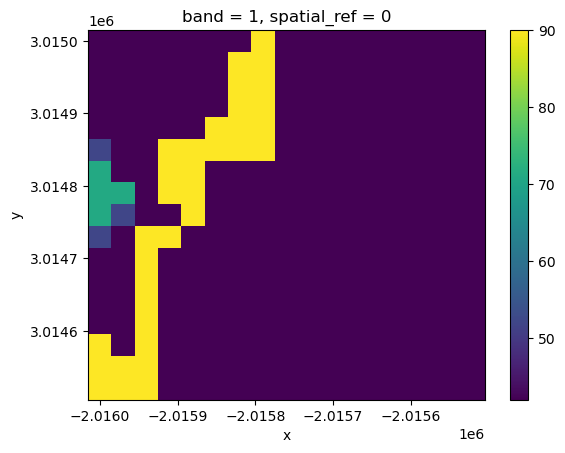

In [42]:
test.plot()

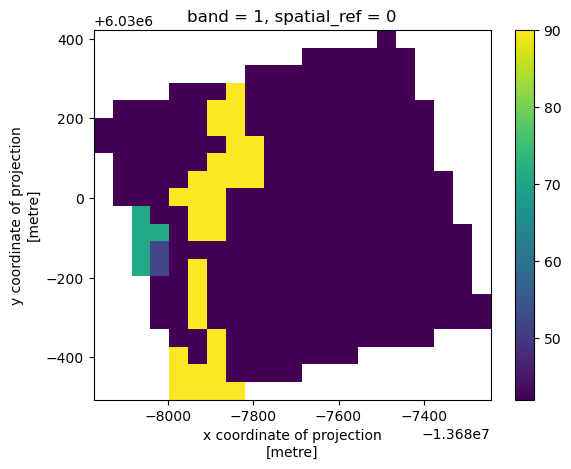

In [45]:
test.rio.reproject('EPSG:3857').plot()

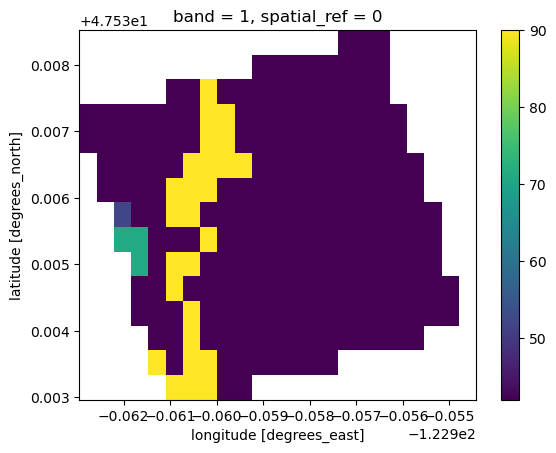

In [43]:
test.rio.reproject('EPSG:4269').plot()

In [ ]:
# nlcd.sel(x=slice(-2417000, -2418000), y=slice(3315000, 3316000))

In [ ]:
nlcd_new = nlcd.rio.reproject('EPSG:4269')

In [ ]:
nlcd.rio.crs

In [ ]:
nlcd_new.rio.crs

In [ ]:
test = nlcd_new.sel(x=slice(-129.2, -100), y=slice(52.92, 50))

In [ ]:
np.unique(test)

In [ ]:
plt.imshow(test, cmap='tab20')
plt.colorbar()

### Project NLCD

In [ ]:
nhd = gpd.read_file(filename='/nas/cee-water/cjgleason/fiona/narrow_rivers_PIXC_data/NHDPLUS_H_0101_HU4_GDB_prepped_buffered_max_TEST.json',
                    columns=['NHDPlusID', 'geometry'])

In [ ]:
# bounds = nhd.total_bounds
# bbox = box(bounds[0], bounds[1], bounds[2], bounds[3])
# geo = gpd.GeoDataFrame({'geometry': [bbox]}, crs="EPSG:4326") # WGS 84

In [80]:
nlcd_path = '/nas/cee-water/cjgleason/data/NLCD/Annual_NLCD_LndCov_2023_CU_C1V0.tif'

In [ ]:
# with rasterio.open(nlcd_path) as raster:
#     nhd = nhd.to_crs(raster.crs)

In [ ]:
# raster

In [81]:
nlcd = rxr.open_rasterio(nlcd_path, masked=True)

In [59]:
nlcd.rio.crs

CRS.from_wkt('PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [60]:
nlcd_crs

'PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

In [54]:
nlcd_crs = nlcd.rio.crs

In [56]:
nlcd_crs = str(nlcd_crs)

In [57]:
nlcd_crs

'PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

In [58]:
nhd = nhd.to_crs(nlcd_crs)

NameError: name 'nhd' is not defined

In [ ]:
# target_crs = CRS.from_string('EPSG:4326')

In [ ]:
# nlcd_reproj = nlcd.rio.reproject(target_crs)

### Testing exactextract

In [63]:
rast = '/nas/cee-water/cjgleason/data/NLCD/Annual_NLCD_LndCov_2023_CU_C1V0.tif'
polys = '/nas/cee-water/cjgleason/fiona/narrow_rivers_PIXC_data/NHD_prepped_buffered_json/HUC2_01/NHDPLUS_H_0101_HU4_GDB_prepped_buffered_min.json'
# old_polys = '/nas/cee-water/cjgleason/fiona/narrow_rivers_PIXC_data/NHD_prepped_buffered/HUC2_01/NHDPLUS_H_0101_HU4_GDB_prepped_buffered_min.parquet'

In [64]:
exact_extract(rast=rast, vec=polys, ops=['frac', 'variety', 'mode', 'minority'], include_cols=["NHDPlusID"], output='pandas')

/work/pi_cjgleason_umass_edu/.conda/envs/narrowPIXC/lib/python3.12/site-packages/exactextract/exact_extract.py:330: RuntimeWarning: Spatial reference system of input features does not exactly match raster.
  warnings.warn(


,NHDPlusID,variety,mode,minority
0,5.000100e+12,3,90.0,21.0
1,5.000100e+12,4,81.0,21.0
2,5.000100e+12,5,90.0,81.0
3,5.000100e+12,7,11.0,90.0
4,5.000100e+12,4,11.0,71.0
...,...,...,...,...
14481,5.000100e+12,1,90.0,90.0
14482,5.000100e+12,3,90.0,43.0
14483,5.000100e+12,7,90.0,95.0
14484,5.000100e+12,3,42.0,43.0


### Confirm this matches what we would get reprojecting here

In [93]:
nhd = gpd.read_file(filename=polys)

In [95]:
nlcd_crs = nlcd.rio.crs

In [96]:
nlcd_crs = str(nlcd_crs)

In [97]:
nhd = nhd.to_crs(nlcd_crs)

In [ ]:
# bounds = nhd.total_bounds
# bbox = box(bounds[0], bounds[1], bounds[2], bounds[3])
# geo = gpd.GeoDataFrame({'geometry': [bbox]}, crs="EPSG:4326") # WGS 84

In [102]:
with rasterio.open(nlcd_path) as raster:
    test = exact_extract(rast=raster, vec=nhd, ops=['unique', 'frac', 'variety', 'mode', 'minority'], include_cols=["NHDPlusID"], output='pandas')

In [103]:
test

,NHDPlusID,variety,mode,majority,minority
0,5.000100e+12,3,90.0,90.0,21.0
1,5.000100e+12,4,81.0,81.0,21.0
2,5.000100e+12,5,90.0,90.0,81.0
3,5.000100e+12,7,11.0,11.0,90.0
4,5.000100e+12,4,11.0,11.0,71.0
...,...,...,...,...,...
14481,5.000100e+12,1,90.0,90.0,90.0
14482,5.000100e+12,3,90.0,90.0,43.0
14483,5.000100e+12,7,90.0,90.0,95.0
14484,5.000100e+12,3,42.0,42.0,43.0


### Land Cover

In [ ]:
tif_path = '/nas/cee-water/cjgleason/data/NLCD/Annual_NLCD_LndCov_2023_CU_C1V0.tif'
poly_path = '/nas/cee-water/cjgleason/fiona/narrow_rivers_PIXC_data/all_wbd_no_great_lakes.parquet/'

In [ ]:
# Read the raster data
with rasterio.open(tif_path) as src:
    print(src.crs)
    raster_img = src.read(1)
    raster_profile = src.profile

In [ ]:
raster_profile

In [ ]:
test = raster_img[10000:11000, 10000:11000]

In [ ]:
test

In [ ]:
np.unique(test)

In [ ]:
plt.imshow(test, cmap='tab20')
plt.colorbar()

In [ ]:
wbd = gpd.read_parquet(poly_path)

In [ ]:
temp = wbd.iloc[[0]]

In [ ]:
if temp.crs != raster_profile['crs']:
    temp = temp.to_crs(raster_profile['crs'])

In [ ]:
geoms = [shapes for shapes in temp.geometry]

In [ ]:
pwd

In [ ]:
with rasterio.open('../narrow_rivers_PIXC_data/clipped_raster.tif', 'w', **raster_profile) as dest:
        out_image, out_transform = mask(dataset=raster_img, shapes=geoms, crop=True)
        dest.write(out_image, 1)